# Preprocessing Numpy Files

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
from tqdm import tqdm

## Load numpy files

In [2]:
# read all numpy files from new_sample folder

folder_path = 'new_sample'
files = [f for f in os.listdir(folder_path) if f.endswith('.npy')]
data = []
for file in files:
    file_path = os.path.join(folder_path, file)
    data.append(np.load(file_path))


## Find the maximum height and width directly

In [3]:
# Find the maximum height and width directly
max_height = max(d.shape[0] for d in data)
max_width = max(d.shape[1] for d in data)

# Ensure they are at least the max found values and a multiple of 8
max_height = ((max_height + 7) // 8) * 8  
max_width = ((max_width + 7) // 8) * 8  

print(max_height, max_width)


88 232


## Add padding to all images 

I added padding instead of rescaling the image to maintain the original size, as it could impact downstream tasks.



In [4]:
# add padding to all images to make them of same size
padded_data = [
    np.pad(
        d, 
        (((max_height - d.shape[0]) // 2, (max_height - d.shape[0] + 1) // 2), 
         ((max_width - d.shape[1]) // 2, (max_width - d.shape[1] + 1) // 2)), 
        mode='constant', constant_values=0
    ) 
    for d in tqdm(data, desc="Padding images")
]

Padding images: 100%|██████████| 1290/1290 [00:00<00:00, 25488.04it/s]


In [18]:
np.min(padded_data[0])


# create a histogram of the first image

np.unique(padded_data[6])

array([   0, 1979, 1982, 1985, 1988, 1991, 1994, 1997, 2000, 2003, 2006,
       2010, 2013, 2016, 2019, 2022, 2025, 2028, 2031, 2034, 2038, 2041,
       2044, 2047, 2050, 2054, 2057, 2060, 2063, 2066, 2070, 2073, 2076,
       2080, 2083, 2086, 2090, 2093, 2096, 2100, 2103, 2106, 2110, 2113,
       2116, 2120, 2123, 2127, 2130, 2134, 2137, 2141, 2144, 2148, 2151,
       2155, 2158, 2162, 2165, 2169, 2173, 2176, 2180, 2183, 2187, 2191,
       2194, 2198, 2199, 2202, 2205, 2209, 2213, 2217, 2220, 2224, 2228,
       2229, 2232, 2235, 2239, 2243, 2247, 2251, 2255, 2259, 2262, 2266,
       2270, 2274, 2278, 2282, 2286, 2290, 2294, 2298, 2302, 2306, 2310,
       2314, 2318, 2323, 2327, 2331, 2335, 2339, 2343, 2347, 2352, 2356,
       2360, 2364, 2369, 2373, 2377, 2382, 2386, 2390, 2395, 2399, 2403,
       2408, 2412, 2417, 2421, 2426, 2430, 2435, 2439, 2444, 2448, 2453,
       2457, 2462, 2467, 2471, 2476, 2481, 2485, 2490, 2495, 2499, 2504,
       2509, 2514, 2519, 2524, 2538, 2543, 2548, 25

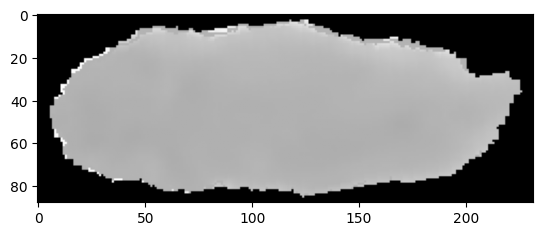

In [30]:
# plot one of the images

plt.imshow(padded_data[0], cmap='gray')
plt.show()

## Split the dataset into training, validation, and test sets.

In [25]:
# Set random seed for reproducibility
np.random.seed(0)

# Shuffle data
np.random.shuffle(padded_data)

# Split dataset 80-10-10
train_size = int(0.8 * len(padded_data))
val_size = int(0.1 * len(padded_data))

train_data = padded_data[:train_size]
val_data = padded_data[train_size:train_size + val_size]
test_data = padded_data[train_size + val_size:]  # Avoids redundant calculations

# Define base directory and subdirectories
base_dir = 'processed_data'
subdirs = ['train', 'val', 'test']

# Create necessary directories
for subdir in subdirs:
    os.makedirs(os.path.join(base_dir, subdir), exist_ok=True)

# Helper function to save data
def save_numpy_files(data, folder):
    path = os.path.join(base_dir, folder)
    for i, d in enumerate(data):
        np.save(os.path.join(path, f"{i}.npy"), d)

# Save datasets
save_numpy_files(train_data, 'train')
save_numpy_files(val_data, 'val')
save_numpy_files(test_data, 'test')

print("Data saved successfully!")




Data saved successfully!
